Import packages to be used and define local path to acess files downloded from https://www.kaggle.com/competitions/spaceship-titanic/

In [759]:
import os
import pandas as pd
import matplotlib as plt
import numpy as np

import pickle

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay


from xgboost import XGBClassifier
from xgboost import plot_importance

os.chdir('/Users/paulorusso/Downloads/spaceship-titanic')
os.getcwd()

'/Users/paulorusso/Downloads/spaceship-titanic'

Naming datasets as df_train and df_test based on files downloded for the Kaggle competition.

In [760]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [761]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Some features are not necessary for the model so removing from both data sets the columns:

- 'PassengerId'
- 'Cabin'
- 'Name'

Not dropping missing values for this analysis.

In [762]:
df_train1 = df_train.drop(['PassengerId', 'Name', 'Cabin'] ,axis=1)
df_test1 = df_test.drop(['PassengerId', 'Name', 'Cabin'] ,axis=1)

In [763]:
df_train1.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [764]:
df_test1.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0


Time to convert the categorical features into numerical.

In [765]:
df_train1['Transported'].replace([True, False], [1, 0], inplace=True)

df_train2 = pd.get_dummies(df_train1, dtype=int)
df_test2 = pd.get_dummies(df_test1, dtype=int)

In [766]:
df_train2.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
0,39.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0,0,0,1,1,0
1,24.0,109.0,9.0,25.0,549.0,44.0,1,1,0,0,1,0,0,0,1,1,0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0,0,1,0,1,0,0,0,1,0,1
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0,0,1,0,1,0,0,0,1,1,0
4,16.0,303.0,70.0,151.0,565.0,2.0,1,1,0,0,1,0,0,0,1,1,0


In [767]:
df_test2.head()


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
0,27.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0,0,1,1,0
1,19.0,0.0,9.0,0.0,2823.0,0.0,1,0,0,1,0,0,0,1,1,0
2,31.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1,1,0,0,1,0
3,38.0,0.0,6652.0,0.0,181.0,585.0,0,1,0,1,0,0,0,1,1,0
4,20.0,10.0,0.0,635.0,0.0,0.0,1,0,0,1,0,0,0,1,1,0


Before we isolate, is good to check the class imbalance of target variable, which is about 50% to 50%, seems great.

In [768]:
df_train2['Transported'].value_counts(normalize=True)

Transported
1    0.503624
0    0.496376
Name: proportion, dtype: float64

Isolate the target (column Survived), divide the 'df_train2' dataset for modelling and instantiate the XGB model.

In [769]:
y = df_train2['Transported']

X = df_train2.drop('Transported',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

xgb = XGBClassifier(objective='binary:logistic', random_state=0)

Define the hyperparameters and scoring.

In [770]:
cv_params = {'max_depth': [6, 10],
              'min_child_weight': [12, 30],
              'learning_rate': [0.1, 0.2, 0.3],
              'n_estimators': [20, 50, 100],
              'subsample': [0.7],
              'colsample_bytree': [0.7]
              }

scoring = ['accuracy', 'precision', 'recall', 'f1']

Construct Gridsearch for cross validation

In [771]:
xgb_cv = GridSearchCV(xgb,
                      cv_params,
                      scoring = scoring,
                      cv = 5,
                      refit = 'accuracy'
                     )

Train the model

In [772]:
%%time
xgb_cv = xgb_cv.fit(X_train, y_train)
xgb_cv

CPU times: user 44.3 s, sys: 14.8 s, total: 59.1 s
Wall time: 8.36 s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.1, 0.2, 0.3], 'max_depth': [6, 10],
                         'min_child_weight': [12, 30],
                         'n_estimators': [20, 50, 100], 'subsample': [0.7]},
             refit='accuracy',
             scoring=['accuracy', 'precision', 'recall', 'f1'])

Check best paraments

In [773]:
xgb_cv.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.3,
 'max_depth': 10,
 'min_child_weight': 30,
 'n_estimators': 50,
 'subsample': 0.7}

Create a function to output results in a table, so in case a new model is used, we can use the table tro compare them

In [774]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy',
                   }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          },
                         )

    return table

Output model results in a table

In [775]:
results = make_results('XGB cv', xgb_cv, 'accuracy')
results

,model,precision,recall,F1,accuracy
0,XGB cv,0.788063,0.810724,0.799152,0.794906


Create another function to output the results made on test (untouched) data

In [776]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
        model_name (string): Your choice: how the model will be named in the output table
        preds: numpy array of test predictions
        y_test_data: numpy array of y_test data

    Out:
        table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy]
                          })

    return table

Use XGBoost model to predict on test data, get test scores for XGBoost model and append to the results to the same table

In [777]:
xgb_test_preds = xgb_cv.best_estimator_.predict(X_test)

xgb_test_scores = get_test_scores('XGB test', xgb_test_preds, y_test)

results = pd.concat([results, xgb_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,XGB cv,0.788063,0.810724,0.799152,0.794906
0,XGB test,0.783276,0.836828,0.809167,0.800828


Use XGBoost model to make predictions from the external dataset (untouched) from Kaggle

In [778]:
xgb_test_EXT_preds = xgb_cv.best_estimator_.predict(df_test2)

Create a dataset in the format requested by Kaggle

In [779]:
pax_id = df_test['PassengerId']

d = {'PassengerId': pax_id, 'Transported': (xgb_test_EXT_preds)}

transported_submission = pd.DataFrame(data=d)

transported_submission.replace([1, 0], ['True', 'False'], inplace = True)

transported_submission.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


Save output table as csv

In [756]:
transported_submission.to_csv('my_transported_submission.csv', index=False)  

Generate array of values for confusion matrix and plot

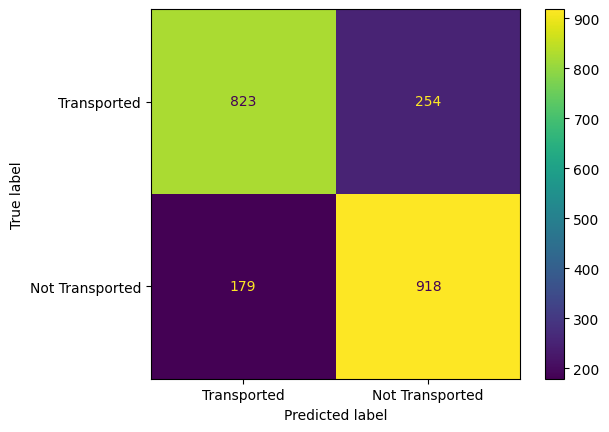

In [780]:
cm = confusion_matrix(y_test, xgb_test_preds, labels=xgb_cv.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=['Transported', 'Not Transported'])
disp.plot()

Plot feature importance to check what features had more weight in the predicion.

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

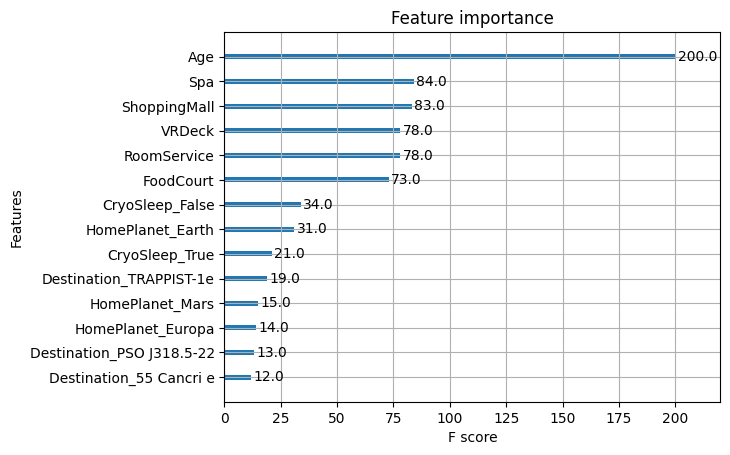

In [781]:
plot_importance(xgb_cv.best_estimator_)

Conclusions:

- XGBoost model had an accurancy of approx 80% on predicting passengers who were transported to another dimesion or not on Spaceship Titanic;

- The variables that contributed more to the preditions were the Age, followed by Spa, Shopping Mall, VRDeck, RoomService and FoodCourt (All last variables related to spendings made on different areas of the Spaceship);